# Potential Coffee Customer Demographics

**From [Kaggle][id]**: _Basic marketing data for a small coffee shop chain showing potential customers that were contacted via a marketing campaign and whether or not they made a coffee purchase._    
<span style="font-size:17px">    
The goal of this notebook is to draw insights to inform future marketing strategies. At the end, we should be able to describe our current demographic and determine where to focus our marketing efforts.

[id]: https://www.kaggle.com/datasets/brandonschabell/coffeeshopdata


## Loading and Cleaning the Data
<br>
<span style="font-size:13px">
<p><i>IMPORTANT! If you're loading this dataset on your own, remember to change the file location below to where the file lives on your device!</i></p>

<span style="font-size:17px">
    <p>Let's start by grabbing our data, as well as <span style="color:green"><b>import</b></span>ing any packages we'll need later on. We'll <span style="color:green">print</span> a general overview of the data to get a look at what we're working with.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec

In [2]:
# Import our data, copy to leave the original untouched
ds = pd.read_csv('file:///C:/Users/samus/Documents/All%20Sammie%20Stuff/Downloads/archive(3)/base_dataset.csv')
df = pd.DataFrame(ds.copy())

In [3]:
# Glance at the data, search for null values
print(df.head())
print('The shape of the data is:', df.shape)
print(df.dtypes)
print(df.isnull().values.sum(), 'values are missing.')
print(df['competitor_satisfaction'].isnull().values.sum(), "of those values are from 'competitor_satisfaction'.")

                 id date_contacted             city state               dob  \
0  1f3616520cc567f6     2019-09-16          Chicago    IL        07/04/1984   
1  bba909acb4ee09ad     2018-07-13          Wheaton    IL        Sep 26, 83   
2  41bbc4397911869c     2018-06-26       Glen Ellyn    IL  November 06 1980   
3  acde7a45c3c8fbed     2018-05-03  Hoffman Estates    IL        Jan 22, 74   
4  e24da06a896d1cc6     2019-08-05      St. Charles    IL   January 31 1988   

   gender  employment  owns_car owns_coffee_machine  owns_home  \
0    male   full-time     False                nope      False   
1  female     retired      True                 YES      False   
2    male   full-time      True                  no       True   
3  female   part-time      True                 yes      False   
4  female  unemployed      True        I don't know      False   

  beverage_preference  number_of_bags_purchased_competitor  \
0                 bee                                    0   
1   

<span style="font-size:17px"> 
    <p>Well, that doesn't look good. <span style="color:#ba2121">'owns_coffee_machine'</span> should be a <span style="color:green">bool</span> column, the <span style="color:#ba2121">'dob'</span> column's formating is all over the place, and I spy a misspelling in <span style="color:#ba2121">'beverage_preferences'</span>. On the upside, it looks like we have lots of detail from a lot of customers to work with!</p>
<p>Let's start with the misspellings.</p>

In [4]:
# Check for misspellings
print('Unique beverage preferences:\n' + str(df['beverage_preference'].unique()))
print('\nUnique employment statuses:\n' + str(df['employment'].unique()))
print('\nUnique coffee machine ownership statuses:\n' + str(df['owns_coffee_machine'].unique()))
print('\nUnique genders:\n' + str(df['gender'].unique()))

Unique beverage preferences:
['bee' 'wine' 'coffee' 'water' 'tea' 'beer' 'soda' 'wter' 'cffee' 'sod'
 'cfofee' 'cofefe' 'watre' 'te' 'sda' 'soad' 'wate' 'ber' 'cofee' 'waetr'
 'wien' 'soa' 'ta' 'tae' 'coffe' 'watr' 'bere' 'wtaer' 'sdoa' 'wie' 'wnie'
 'wne' 'waer' 'win']

Unique employment statuses:
['full-time' 'retired' 'part-time' 'unemployed' 'student' 'studen'
 'part-tim' 'fll-time' 'full-tie' 'ful-time' 'fulltime' 'full-tiem'
 'unemployde' 'part-tie' 'pat-time' 'uneployed' 'ful-ltime' 'fullt-ime'
 'flul-time' 'part-tmie' 'unemplyed' 'part-ime' 'uenmployed' 'parttime'
 'stuent' 'full-itme' 'full-tmie' 'stuednt' 'partt-ime' 'full-tim'
 'prat-time' 'rtired' 'studetn' 'patr-time' 'studet' 'unmployed'
 'par-time' 'unempolyed' 'retred' 'stduent' 'full-ime' 'retird'
 'unemlpoyed' 'retierd' 'studnt' 'unempoyed' 'rteired' 'uemployed'
 'retried' 'part-tiem' 'part-itme' 'unemloyed' 'unemployd' 'full-tme'
 'sudent' 'unemplyoed' 'sutdent' 'unemploye' 'stdent' 'retied' 'reitred'
 'par-ttime' 'u

<span style="font-size:17px"> 
<p>Kind of terrible, but not the worst! It looks like every misspelling starts with the same letter as the correct spelling. To fix this, we'll just chop off everything but the first letter in each column, then tell Python what that letter means.</p>
    
<p>Before we can do this, though, we need to deal with <span style="color:#ba2121">'water'</span> and <span style="color:#ba2121">'wine'</span>. Both start with <span style="color:#ba2121">'w'</span>, so they'll be indistinguishable when we behead them. We'll fix this with <span style="color:green"><b>if</b></span> statements that try to <span style="color:purple">match</span> certain letters in <span style="color:#ba2121">'wine'</span>, then replace the whole entry with <span style="color:#ba2121">'n'</span>, a letter unique to this drink.</p>
    
<p>We also decide that, for those who don't know if they own a coffee machine, we'll play it safe and call it <span style="color:green"><b>False</b></span>. We give them the <span style="color:#ba2121">'n'</span> treatment as well.</p>

<p>Now, it's just a matter of chopping and replacing!</p>

In [5]:
# Cleaning misspellings in the 'beverage_preference', 'owns_coffee_machine', and 'employment' columns

for bev in df['beverage_preference']:
    if bev[0] == 'w':
        if bev[1] == 'i' or bev[1] == 'n':
            df['beverage_preference'].replace(bev, 'n', inplace=True)

for cof in df['owns_coffee_machine']:
    if cof[0] == 'I' or cof[0] == 'd':
        df['owns_coffee_machine'].replace(cof, 'n', inplace=True)

df['beverage_preference'] = df['beverage_preference'].str[0]
df['employment'] = df['employment'].str[0]
df['owns_coffee_machine'] = df['owns_coffee_machine'].str[0]

bevref = {'b':'beer', 'c':'coffee', 't':'tea', 'w':'water', 'n':'wine', 's':'soda'}
empref = {'f':'full-time', 'p':'part-time', 'u':'unemployed', 's':'student', 'r':'retired'}
cofref = {'Y':True, 'y':True, 'N':False, 'n':False}

df['beverage_preference'] = df['beverage_preference'].replace(bevref)
df['employment'] = df['employment'].replace(empref)
df['owns_coffee_machine'] = df['owns_coffee_machine'].replace(cofref)

<span style="font-size:17px"> 
<p>Next, let's look at those date columns. I know we can get the customer's age by getting the year <span style="color:purple">difference</span> between their <span style="color:#ba2121">'dob'</span> and their <span style="color:#ba2121">'date_contacted'</span>, but we need to help pandas get there first. Luckily, pandas is pretty smart when it comes to converting columns, and even does a pretty good job handling the mismatched formats from <span style="color:#ba2121">'dob'</span>!</p>

<p>But it's not perfect. The last <span style="color:#ba2121">'date_contacted'</span> was in <span style="color:green">2019</span>, but pandas has set some of these birth dates to the <span style="color:green">2070</span>'s! The remedy is simple: <span style="color:green"><b>if</b></span> a date is set <span style="color:purple">in or after</span> <span style="color:green">2020</span>, replace it with the same date <span style="color:purple">minus</span> <span style="color:green">one hundred</span> years.</p>

<p>Now we can find the age just by <span style="color:purple">subtracting</span> the year values, then doing a clever trick with <span style="color:green">booleans</span> to <span style="color:purple">subtract</span> <span style="color:green">one</span> year <span style="color:green"><b>if</b></span> the <span style="color:#ba2121">'date_contacted'</span> fell <span style="color:purple">before</span> the customer's <span style="color:#ba2121">'dob'</span>. We now have an <span style="color:#ba2121">'age'</span> column!</p></span>

In [6]:
# Convert date columns to datetime objects and extract customer age

df['dob'] = pd.to_datetime(df['dob'])
df['date_contacted'] = pd.to_datetime(df['date_contacted'])

for date in df['dob']:
    if date.year >= 2020:
        df['dob'].replace(date, date - pd.offsets.DateOffset(years=100), inplace=True)
        
df['age'] = (
    df.date_contacted.dt.year - df.dob.dt.year
    -
    (df.date_contacted.dt.month < df.dob.dt.month)
    -
    ((df.date_contacted.dt.month == df.dob.dt.month) & (df.date_contacted.dt.day < df.date_contacted.dt.day))
)

<span style="font-size:17px"> 
<p>For the null values, we know they were all in the <span style="color:#ba2121">'competitor_satisfaction'</span> column, so they're probably from where the customer never bought coffee from our competitors in the first place. We'll fill these values with <span style="color:purple">-</span><span style="color:green">1</span> so that we can filter them out later.</p>
<p>We'll end by dropping the <span style="color:#ba2121">'date'</span> columns, <span style="color:#ba2121">'id'</span>s, and <span style="color:#ba2121">'state'</span>s (every state is Illinois).</p>

In [7]:
df = df.drop(['id', 'state', 'date_contacted', 'dob'], axis=1)
df.fillna(value=-1, inplace=True)

## Preparing for Analysis

<span style="font-size:17px"> 
<p>We want to glean all that we can from the demographics gathered from this dataset, but since we want about the same information for every demographic, it's better to <span style="color:green"><b>write</b></span> general <span style="color:blue">plotting functions</span> first, and then feed them the demographics that we want to see. That way, we can look at as many demographics as we want, and we only have to write the code once!</p>

<p>We'll start with just three. We'll look at the demographics for customers whose <span style="color:#ba2121">'beverage_preference'</span> <span style="color:purple">is</span> <span style="color:#ba2121">'coffee'</span>, customers who <span style="color:green"><b>have</b></span> <span style="color:#ba2121">'bought_coffee'</span> from us before, and customers that <span style="color:green"><b>have</b></span> tried our competitors' coffee <span style="color:purple"><b>and</b></span> had a <span style="color:#ba2121">'competitor_satisfaction'</span> <span style="color:purple">lower</span> than <span style="color:green">3</span> stars.</p>

<p>While we're here, let's set up some standardized text formatting variables, too.</p>

In [8]:
# Create pre-filtered dataframes for future use

coffee_drinkers = df.loc[df['beverage_preference'] == 'coffee']
our_customers = df.loc[df['bought_coffee'] == True]
low_competitor_satisfaction = df.loc[(df['competitor_satisfaction'] < 3) & (df['competitor_satisfaction'] != -1)]

In [9]:
# Create dictionaries for standardized formating

coffeecolors={'darkbrown':'#432d11', 'darkgray':'#554a3f',
             'lightgray':'#7d7879', 'mediumbrown':'#ae8253',
             'lightbrown':'#d7c197', 'altbrown':'#cca46f'}
axisdict={'color':coffeecolors['darkgray'], 'weight':'heavy'}
titledict={'color':coffeecolors['darkbrown'], 'weight':'heavy', 'size':'x-large'}
sidewaysdict = axisdict.copy()
sidewaysdict.update({'rotation':-22.5})

<span style="font-size:17px"> 
    <p>Let's <span style="color:green"><b>make</b></span> our <span style="color:blue">meta function</span> first. This is what will be taking the dataframe we feed it and sending it to some other <span style="color:blue">plotting functions</span> that we'll make later. We'll use GridSpec to set up our layout, then <span style="color:green"><b>define</b></span> and use a <span style="color:blue">smart function</span> that will <span style="color:green"><b>switch</b></span> the graph's title <span style="color:purple">based on</span> which dataframe it was given.</p>

In [10]:
def statsrunner(dataframe):
    
    fig = plt.figure(tight_layout=True, figsize=(10,8))
    gs = GridSpec(3, 3, figure=fig)

    ax1 = plt.subplot(gs[0, :-1])
    ax2 = plt.subplot(gs[1, :-1])
    ax3 = plt.subplot(gs[:-1, -1])
    ax4 = plt.subplot(gs[-1, 0])
    ax5 = plt.subplot(gs[-1, 1])
    ax6 = plt.subplot(gs[-1, -1])
    
    firstaxesbooleans(ax1, dataframe)
    secondaxesages(ax2, dataframe)
    thirdaxesstatistics(ax3, dataframe)
    fourthaxesbeverages(ax4, dataframe)
    fifthaxescustomers(ax5, dataframe)
    sixthaxescompetitors(ax6, dataframe)

    fig.suptitle(autotitler(dataframe), fontweight='bold', fontsize='xx-large')
    
    plt.show()

In [11]:
def autotitler(dataframe):
    
    title = 'Base Dataset'
    
    if dataframe is coffee_drinkers:
        title = 'Coffee Drinkers'
    if dataframe is our_customers:
        title = 'Our Customers'
    if dataframe is low_competitor_satisfaction:
        title = "Competitors' Dissatisfied Customers"

    return title

<span style="font-size:17px"> 
<p>First, our <span style="color:blue">boolean function</span>. This <span style="color:green"><b>returns</b></span> a clustered bar chart that shows the total <span style="color:green"><b>True/False</b></span> values of our <span style="color:green">bool</span> columns, as well as the values for <span style="color:#ba2121">'gender'</span>, since that's technically a binary column too. The <span style="color:blue">function</span> takes the Axes that it's supposed to be crafting, grabs the statistics from the value_counts() function, formats them, then <span style="color:green"><b>spits</b></span> the Axes into its spot in the GridSpec.</p>

<p>Second, the <span style="color:blue">age function</span>. This <span style="color:blue">function</span> works very similarly to the first, but makes a histogram from our brand new <span style="color:#ba2121">'age'</span> column. The <span style="color:blue">function</span> gets the Axes, builds a histogram, formats it, then <span style="color:green"><b>spits</b></span> it back in place.</p>

In [12]:
def firstaxesbooleans(ax, dataframe):

    boolcolumns = ['gender', 'owns_coffee_machine', 'owns_car', 'owns_home']
    x = np.arange(len(boolcolumns))
    bwidth = 0.4
    bartrue = []
    barfalse = []
    
    for boolcol in boolcolumns:
        bartrue.append(dataframe[boolcol].value_counts().iloc[0])
        barfalse.append(dataframe[boolcol].value_counts().iloc[1])

    boolbars1 = ax.bar(x-bwidth/2, bartrue, width=bwidth, color=coffeecolors['darkgray'])
    boolbars2 = ax.bar(x+bwidth/2, barfalse, width=bwidth, color=coffeecolors['lightgray'])
    
    ax.set_xticks(ticks=range(4))
    ax.set_xticklabels(['Gender', 'Owns Coffee Machine?', 'Owns Car?', 'Owns Home?'], fontdict=axisdict)
    ax.tick_params(axis='x', width=0)
    ax.set_ylabel('# of customers', fontdict=axisdict)
    ax.legend(handles=[boolbars1, boolbars2], labels=['True/female', 'False/male'], framealpha=0.5)
    ax.set_title('Genders, Ownership', fontdict=titledict)
    
    return ax

def secondaxesages(ax, dataframe):
    
    ax.hist(dataframe['age'], color=coffeecolors['mediumbrown'], ec=coffeecolors['darkbrown'], lw=2)
    
    ax.set_xlabel('Age in yrs.', fontdict=axisdict)
    ax.set_ylabel('# of customers', fontdict=axisdict)
    ax.set_title('Age Distribution', fontdict=titledict)
    
    return ax

<span style="font-size:17px"> 
    <p>Our third "<span style="color:blue">plotting function</span>" is more of a text box _disguised_ as an Axes. Here we'll grab the highest frequency of <span style="color:#ba2121">'employment'</span> status, the customer's <span style="color:#ba2121">'city'</span>, the <span style="color:green">count</span> of customers in the current set, the average <span style="color:#ba2121">'competitor_satisfaction'</span>, and the average <span style="color:#ba2121">'number_of_bags_purchased_(from)_competitors'</span>. We format the box right here in this <span style="color:blue">function</span> and <span style="color:green"><b>spit</b></span> it back out as an Axes, complete with a matplotlib.patches Rectangle to pretend it's still a grid. Next!</p>

In [13]:
def thirdaxesstatistics(ax, dataframe):
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    p = patches.Rectangle((left, bottom), width, height, fill=False, transform=ax.transAxes, clip_on=False)
    
    statsgrabber = [
        dataframe['employment'].value_counts().index[0],
        dataframe['city'].value_counts().index[0],
        dataframe.shape[0],
        dataframe.loc[dataframe['competitor_satisfaction'] != -1].competitor_satisfaction.mean(),    
        dataframe['number_of_bags_purchased_competitor'].mean()
    ]
    
    statsstring = ('Top employment:\n' + str(statsgrabber[0])
                    + '\n\nTop city:\n' + str(statsgrabber[1])
                    + '\n\nCustomers in set:\n' + str(statsgrabber[2])
                    + '\n\nAvg. competitor\nsatisfaction:\n' + str(round(statsgrabber[3], 2))
                    + '\n\nAvg. competitor\nbags purchased:\n' + str(round(statsgrabber[4], 2)))
    
    ax.text(0.1, 0.94, s=statsstring, horizontalalignment='left',
    verticalalignment='top', linespacing=1.25,
    transform=ax.transAxes, fontsize='x-large', color=coffeecolors['darkbrown'])
    
    ax.set_axis_off()
    ax.add_patch(p)
    ax.set_title('Statistics', fontdict=titledict)
    
    return ax

<span style="font-size:17px"> 
    <p>The last three <span style="color:blue">functions</span> are similar stories. Our fourth <span style="color:blue">function</span> <span style="color:green"><b>gives</b></span> us a bar graph that shows where our customers' <span style="color:#ba2121">'beverage_preference'</span>s lay. Our fifth <span style="color:blue">function</span> <span style="color:green"><b>gives</b></span> us a pie chart that shows <span style="color:green">how many</span> customers have <span style="color:#ba2121">'bought_coffee'</span> from us before. Our final <span style="blue">function</span> gives us a histogram, this time showing the distribution of <span style="color:#ba2121">'competitor_satisfaction'</span> scores among the customers in this set. Feed them, format them, <span style="color:green"><b>spit</b></span> them back out into their spot.</p>

In [14]:
def fourthaxesbeverages(ax, dataframe):
    
    bevvalues = dataframe['beverage_preference'].value_counts()
    bevlabels = bevvalues.index
    x = np.arange(len(bevlabels))
    
    ax.bar(x, bevvalues, color=coffeecolors['altbrown'], ec=coffeecolors['darkbrown'])
    
    ax.set_xticks(x)
    ax.set_xticklabels(bevlabels, fontdict=sidewaysdict)
    ax.set_ylabel('# of customers', fontdict=axisdict)
    ax.set_title('Beverage Preferences', fontdict=titledict)
    
    return ax

def fifthaxescustomers(ax, dataframe):
    
    cusvalues = dataframe['bought_coffee'].value_counts()
    cuslabels = cusvalues.index
    x = np.arange(len(cuslabels))
    
    if len(cusvalues) == 1 : piecolors=[coffeecolors['darkgray']]
    else : piecolors=[coffeecolors['lightgray'], coffeecolors['darkgray']]

    ax.pie(cusvalues, labels=cuslabels, colors=piecolors, textprops=axisdict)
    
    ax.set_title('Our customers?', fontdict=titledict)
    
    return ax

def sixthaxescompetitors(ax, dataframe):
    
    filteredsatisfaction = dataframe.loc[dataframe['competitor_satisfaction'] != -1].competitor_satisfaction
    
    ax.hist(filteredsatisfaction, color=coffeecolors['mediumbrown'], ec=coffeecolors['darkbrown'], lw=2)
    
    ax.set_xlabel('Rating/5.0', fontdict=axisdict)
    ax.set_ylabel('# of customers', fontdict=axisdict)
    ax.set_title('Competitor Satisfaction', fontdict=titledict)
    
    return ax

## Running the Numbers

<span style="font-size:17px"> 
    <p>Finally, the moment of truth. We've <span style="color:green"><b>built</b></span> every <span style="color:blue">function</span> and set up every dataframe. Let's run our <span style="color:blue">statsrunner function</span> four times: once for the base dataset, then thrice more for the other ones we built. What do we find?</p>

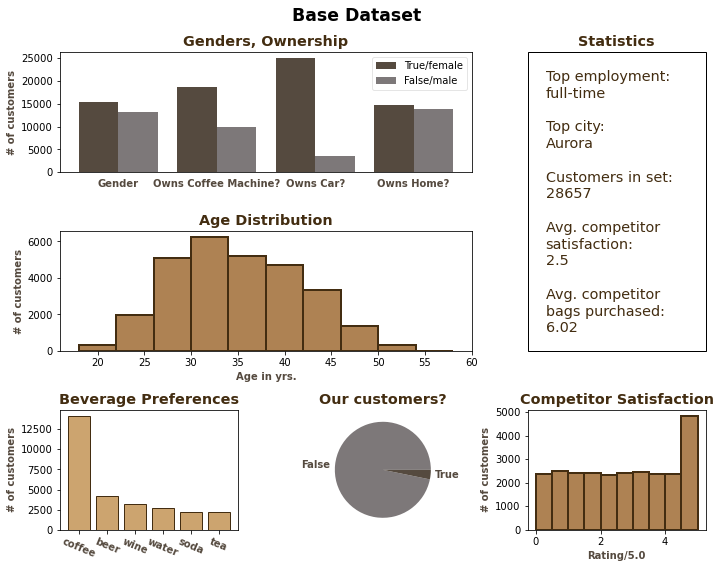

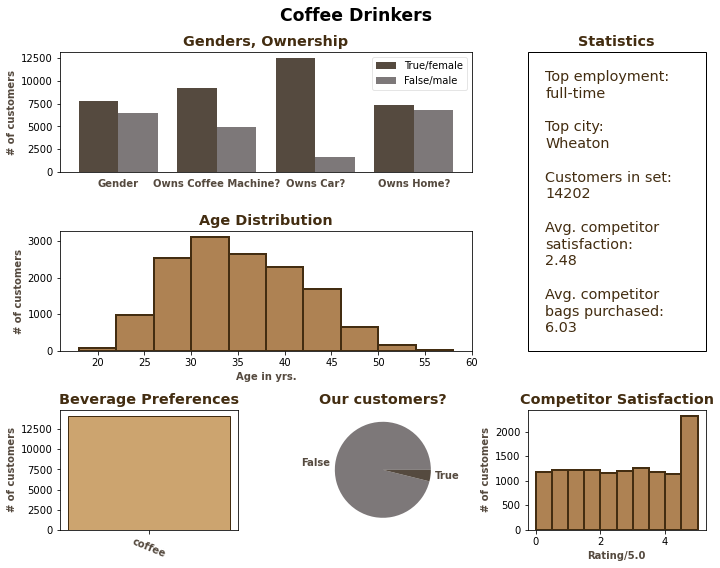

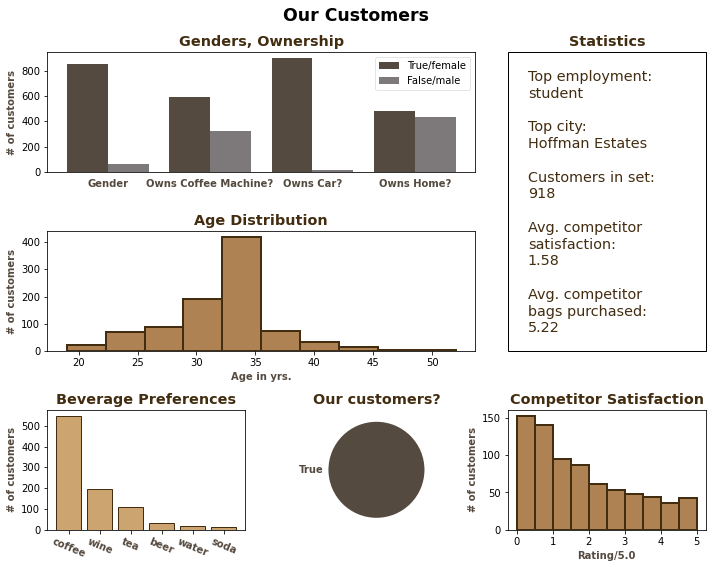

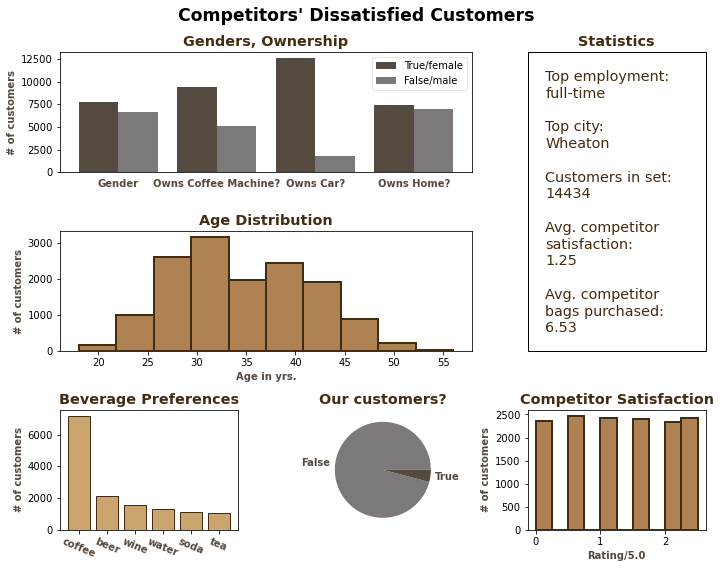

In [15]:
statsrunner(df)
print('')
statsrunner(coffee_drinkers)
print('')
statsrunner(our_customers)
print('')
statsrunner(low_competitor_satisfaction)

## Insights and Final Thoughts

<span style="font-size:17px"> 
<p>It's beautiful! And look at all of this information! There's so much to unpack here. How our own customers are mostly <span style="color:#ba2121">'female'</span>, around <span style="color:green">34</span>, and are <span style="color:#ba2121">'student'</span>s from <span style="color:#ba2121">'Hoffman Estates'</span>, and how they all trend dissatisfied with our competitors. On the dissatisfied customers' side, we actually have a _gap_ in <span style="color:green">~34</span> year olds, with most of their ages falling just beyond that range. What's most interesting, though, is that the statistics for <span style="color:#ba2121">'employment'</span> and <span style="color:#ba2121">'city'</span>, <span style="color:#ba2121">'full-time'</span> customers in <span style="color:#ba2121">'Wheaton'</span>, respectively, are the exact same for both our coffee_drinkers set and our low_competitor_satisfaction set.</p>

<p>What does this mean? I think it's pretty clear where we set our sights next. There is a host of coffee lovers in Wheaton, IL, many of whom work full-time and are dissatisfied with our competitors' coffee, yet have never tried ours. It may be time to start scouting a new location in Wheaton for an age range a little larger than our current one.</p>

<p>I hope you enjoyed my presentation, and learned something, too! Thanks for sticking with me, and let me know what you thought!</p>